In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [14]:
import os

In [15]:
os.chdir('/content/drive/MyDrive/Python Data Science/Project')
print(f'Current working directory : {os.getcwd()}')

Current working directory : /content/drive/MyDrive/Python Data Science/Project


In [16]:
print(f'Files in current dir : {os.listdir()}')

Files in current dir : ['Untitled0.ipynb', 'salaries.csv', '.ipynb_checkpoints']


In [41]:
import pandas as pd
import numpy  as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')

In [18]:
df = pd.read_csv('salaries.csv' , index_col='Unnamed: 0')

In [19]:
df.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L


In [20]:
print("Columns in df : ")
for ind , col in enumerate(df.columns):
    print(f'\t{ind+1}. {col}')

Columns in df : 
	1. work_year
	2. experience_level
	3. employment_type
	4. job_title
	5. salary
	6. salary_currency
	7. salary_in_usd
	8. employee_residence
	9. remote_ratio
	10. company_location
	11. company_size


In [26]:
print("Columns in df : ")
colDataType = lambda col : 'Categorical' if df[col].dtype == 'O' else 'Numerical'
categorical_var = []
numerical_var   = []
for ind , col in enumerate(df.columns):
    dtype = colDataType(col)
    print(f'  {ind+1}. data type of {col} is : {dtype}')
    if dtype == 'Categorical':
        categorical_var.append(col)
    else:
        numerical_var.append(col)

Columns in df : 
  1. data type of work_year is : Numerical
  2. data type of experience_level is : Categorical
  3. data type of employment_type is : Categorical
  4. data type of job_title is : Categorical
  5. data type of salary is : Numerical
  6. data type of salary_currency is : Categorical
  7. data type of salary_in_usd is : Numerical
  8. data type of employee_residence is : Categorical
  9. data type of remote_ratio is : Numerical
  10. data type of company_location is : Categorical
  11. data type of company_size is : Categorical


In [33]:
df.isna().sum()

work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64

In [35]:
df.info(memory_usage = 'deep')

<class 'pandas.core.frame.DataFrame'>
Int64Index: 607 entries, 0 to 606
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           607 non-null    int64 
 1   experience_level    607 non-null    object
 2   employment_type     607 non-null    object
 3   job_title           607 non-null    object
 4   salary              607 non-null    int64 
 5   salary_currency     607 non-null    object
 6   salary_in_usd       607 non-null    int64 
 7   employee_residence  607 non-null    object
 8   remote_ratio        607 non-null    int64 
 9   company_location    607 non-null    object
 10  company_size        607 non-null    object
dtypes: int64(4), object(7)
memory usage: 277.0 KB


In [40]:
categorical_var_distinct_val = []
for col in categorical_var:
    categorical_var_distinct_val.append(df[col].nunique())

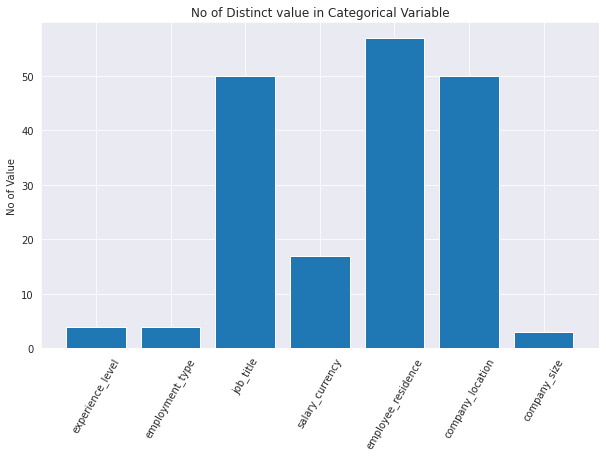

In [43]:
plt.figure(figsize = (10 , 6))
plt.bar(categorical_var , categorical_var_distinct_val)

plt.title("No of Distinct value in Categorical Variable")
plt.ylabel("No of Value")
plt.xticks(categorical_var , rotation = 60)
plt.show()

In [48]:
job_type_exp_salary = df.pivot_table(
    index = 'job_title',
    columns = 'experience_level',
    values = 'salary',
    aggfunc = 'mean'
).fillna(0)

In [49]:
job_type_exp_salary.style.background_gradient()

experience_level,EN,EX,MI,SE
job_title,,,,
3D Computer Vision Researcher,0.000000,0.000000,400000.000000,0.000000
AI Scientist,414750.000000,0.000000,160000.000000,55000.000000
Analytics Engineer,0.000000,155000.000000,0.000000,195000.000000
Applied Data Scientist,80000.000000,0.000000,112500.000000,278500.000000
Applied Machine Learning Scientist,29000.000000,0.000000,178800.000000,0.000000
BI Data Analyst,32136.000000,150000.000000,3732666.666667,0.000000
Big Data Architect,0.000000,0.000000,0.000000,125000.000000
Big Data Engineer,568333.333333,0.000000,583333.333333,92500.000000
Business Data Analyst,75000.000000,0.000000,541666.666667,0.000000


In [57]:
job_type_exp_salary.reset_index().head()

experience_level,job_title,EN,EX,MI,SE
0,3D Computer Vision Researcher,0.0,0.0,400000.0,0.0
1,AI Scientist,414750.0,0.0,160000.0,55000.0
2,Analytics Engineer,0.0,155000.0,0.0,195000.0
3,Applied Data Scientist,80000.0,0.0,112500.0,278500.0
4,Applied Machine Learning Scientist,29000.0,0.0,178800.0,0.0


In [61]:
job_type_exp_salary['EN'][:5]

job_title
3D Computer Vision Researcher              0.0
AI Scientist                          414750.0
Analytics Engineer                         0.0
Applied Data Scientist                 80000.0
Applied Machine Learning Scientist     29000.0
Name: EN, dtype: float64

In [74]:
job_type_exp_salary.loc[job_type_exp_salary.index[job_type_exp_salary.index.map(lambda x : 'Data Sci' in x)]].style.background_gradient()

experience_level,EN,EX,MI,SE
job_title,,,,
Applied Data Scientist,80000.000000,0.000000,112500.000000,278500.000000
Data Science Consultant,139400.000000,59000.000000,103000.000000,0.000000
Data Science Engineer,0.000000,0.000000,34000.000000,109750.000000
Data Science Manager,0.000000,0.000000,200000.000000,1235118.300000
Data Scientist,311231.818182,0.000000,939987.166667,154874.098361
Director of Data Science,0.000000,197500.000000,0.000000,168000.000000
Head of Data Science,0.000000,158958.333333,110000.000000,0.000000
Lead Data Scientist,0.000000,0.000000,115000.000000,1595000.000000
Principal Data Scientist,0.000000,416000.000000,151000.000000,176000.000000


In [76]:
categorical_var

['experience_level',
 'employment_type',
 'job_title',
 'salary_currency',
 'employee_residence',
 'company_location',
 'company_size']

In [77]:
numerical_var

['work_year', 'salary', 'salary_in_usd', 'remote_ratio']

In [78]:
df.drop(['company_location' , 'employee_residence' , 'salary_currency', 'salary'] , axis = 1 , inplace = True)

In [79]:
print("Columns in df : ")
colDataType = lambda col : 'Categorical' if df[col].dtype == 'O' else 'Numerical'
categorical_var = []
numerical_var   = []
for ind , col in enumerate(df.columns):
    dtype = colDataType(col)
    print(f'  {ind+1}. data type of {col} is : {dtype}')
    if dtype == 'Categorical':
        categorical_var.append(col)
    else:
        numerical_var.append(col)

Columns in df : 
  1. data type of work_year is : Numerical
  2. data type of experience_level is : Categorical
  3. data type of employment_type is : Categorical
  4. data type of job_title is : Categorical
  5. data type of salary_in_usd is : Numerical
  6. data type of remote_ratio is : Numerical
  7. data type of company_size is : Categorical


In [115]:
experience_level = {'EN':'Entry-level' , 'MI': 'Mid-level' , 'SE' : 'Senior-level' , 'EX': 'Executive-level'}
employment_type  = {'PT' : 'Part-time', 'FT' : 'Full-time' , 'CT' : 'Contract' , 'FL' : 'Freelance'}
company_size     = {'L' : "Large" , 'M' : 'Medium' , 'S' : 'Small'}

In [111]:
df['experience_level'] = df['experience_level'].map(experience_level)
df['employment_type']  = df['employment_type'].map(employment_type)
df['company_size']     = df['company_size'].map(company_size)

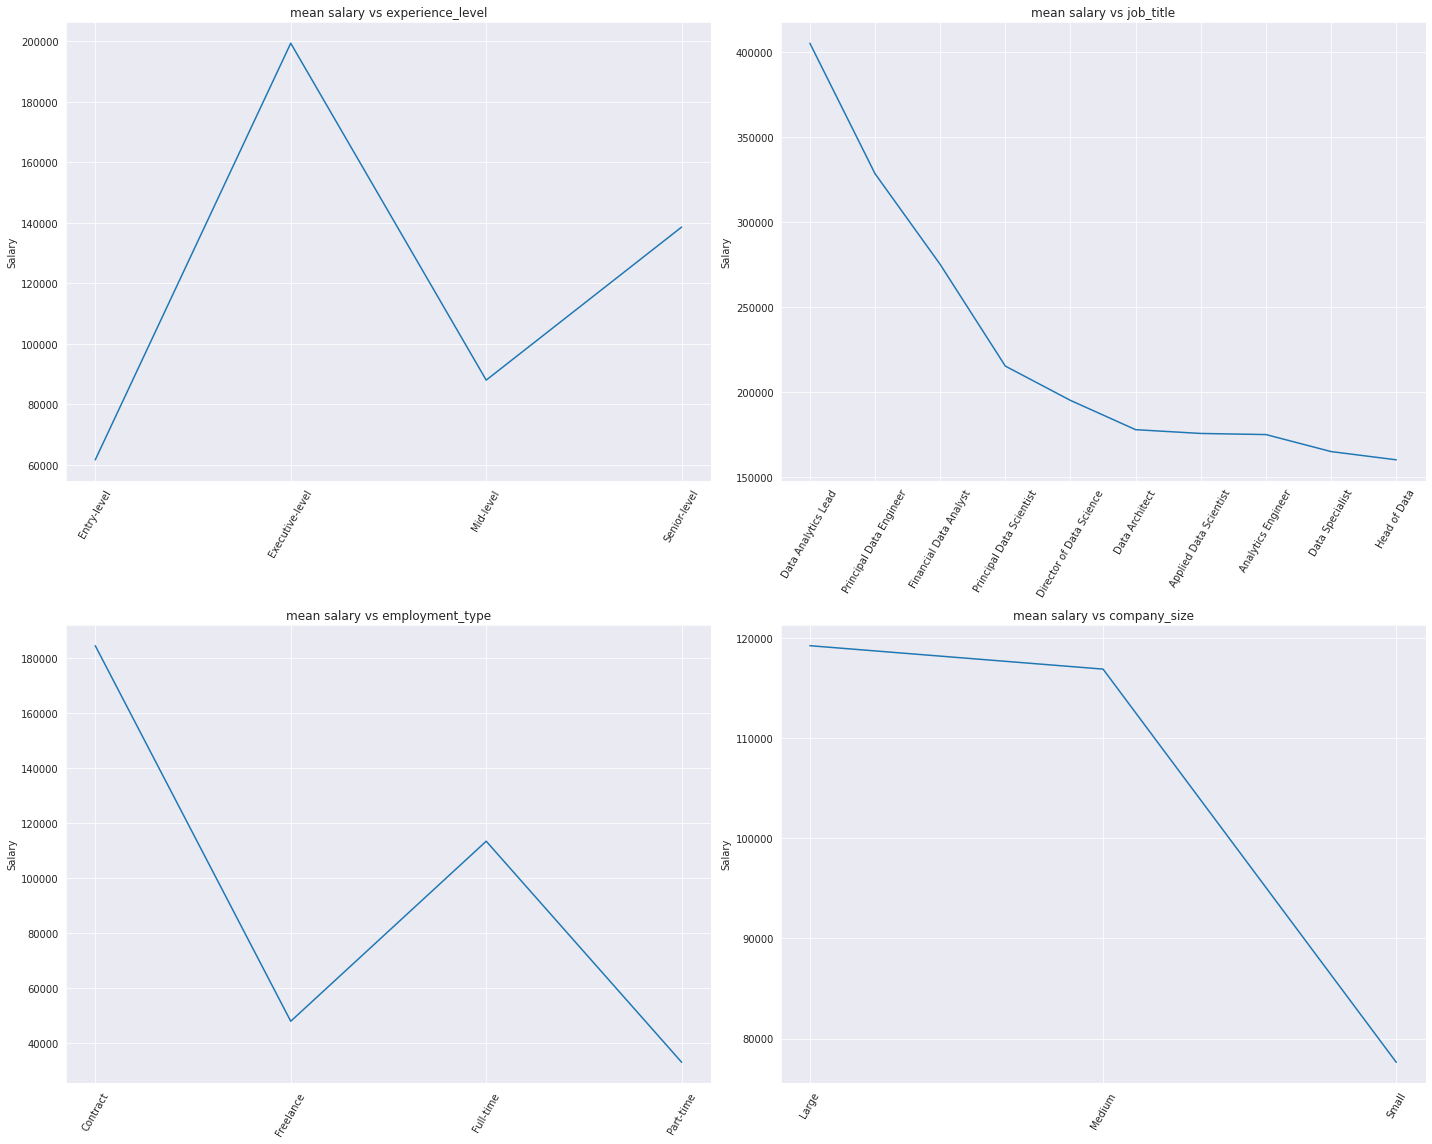

In [142]:
print('\n\n\n')
fig , ax = plt.subplots(2 ,2 , figsize = (20,16))
for ind , col in enumerate(categorical_var):
    i , j = ind%2 , ind // 2
    p = ax[i][j]
    if df[col].nunique() < 10:
        group_mean      = df.groupby(col)['salary_in_usd'].mean()
    else:
        group_mean      = df.groupby(col)['salary_in_usd'].mean().sort_values(ascending=False).iloc[:10]

    group_mean_val  = group_mean.to_numpy()
    group_mean_attr = group_mean.index

    p.plot(group_mean_attr , group_mean_val)
    p.set_title(f'mean salary vs {col}')
    p.set_ylabel("Salary")
    p.set_xticklabels(group_mean_attr , rotation = 60)
fig.tight_layout()
fig.show()
print('\n\n\n')

In [144]:
numerical_var

['work_year', 'salary_in_usd', 'remote_ratio']

In [145]:
df[numerical_var]

,work_year,salary_in_usd,remote_ratio
0,2020,79833,0
1,2020,260000,0
2,2020,109024,50
3,2020,20000,0
4,2020,150000,50
...,...,...,...
602,2022,154000,100
603,2022,126000,100
604,2022,129000,0
605,2022,150000,100


In [146]:
df.drop('work_year' , axis = 1 , inplace = True)

In [147]:
print("Columns in df : ")
colDataType = lambda col : 'Categorical' if df[col].dtype == 'O' else 'Numerical'
categorical_var = []
numerical_var   = []
for ind , col in enumerate(df.columns):
    dtype = colDataType(col)
    print(f'  {ind+1}. data type of {col} is : {dtype}')
    if dtype == 'Categorical':
        categorical_var.append(col)
    else:
        numerical_var.append(col)

Columns in df : 
  1. data type of experience_level is : Categorical
  2. data type of employment_type is : Categorical
  3. data type of job_title is : Categorical
  4. data type of salary_in_usd is : Numerical
  5. data type of remote_ratio is : Numerical
  6. data type of company_size is : Categorical


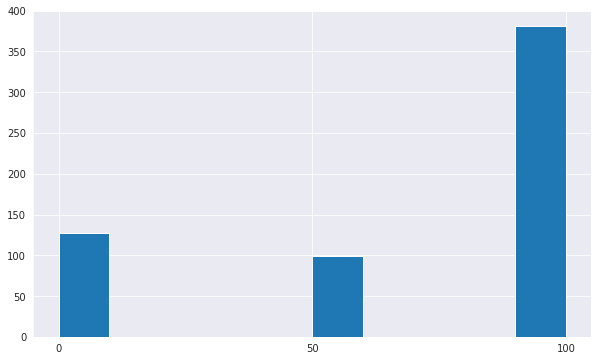

In [157]:
plt.figure(figsize=(10,6))
plt.hist(df['remote_ratio'])
plt.xticks(df['remote_ratio'].unique())
plt.show()

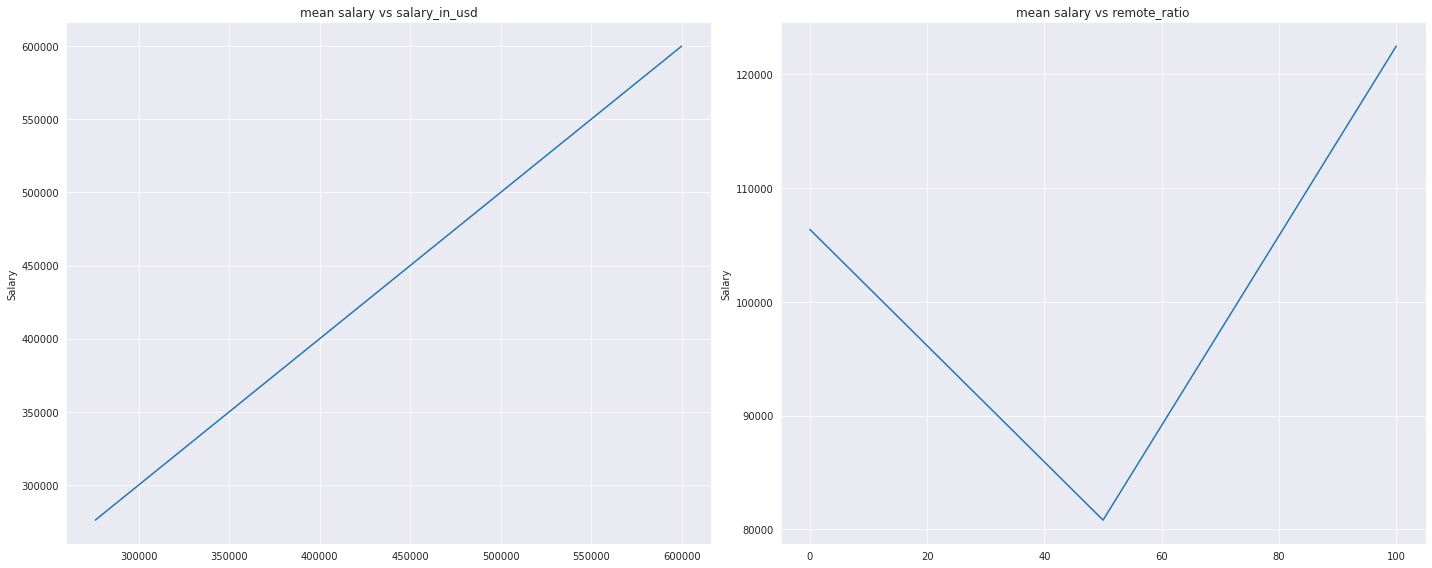

In [161]:
print('\n\n\n')
fig , ax = plt.subplots(1 ,2 , figsize = (20,8))
for ind , col in enumerate(numerical_var):
    i , j = ind%2 , ind // 2
    p = ax[i]
    if df[col].nunique() < 10:
        group_mean      = df.groupby(col)['salary_in_usd'].mean()
    else:
        group_mean      = df.groupby(col)['salary_in_usd'].mean().sort_values(ascending=False).iloc[:10]

    group_mean_val  = group_mean.to_numpy()
    group_mean_attr = group_mean.index

    p.plot(group_mean_attr , group_mean_val)
    p.set_title(f'mean salary vs {col}')
    p.set_ylabel("Salary")
fig.tight_layout()
fig.show()
print('\n\n\n')